# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [1]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:** The *Smartcab* does not move during the simulation. It simply idles at the initial intersection as the simulation progresses regardless of whether or not the agent has a red light or a green light. The agent is receiving small floating point numerical rewards during the simulation based on its actions. After only 40 iterations of the simulation, I am seeing reward values in the range $(-6, 2)$. The complete range of values likely differs from this, but this range is probably representative of the scale of all rewards. When the *Smartcab* idles at a red light, it receives a positive reward, e.g., in the range $(0, 2)$. When the *Smartcab* idles at a green light with no oncoming traffic, it receives a negative reward, e.g., in the range $(-6, 0)$. It appears that making wrong decisions, like not moving forward or tunring at a green light with no oncoming traffic, is more costly to the agent than making correct decisions. During the short duration of the simulation that I watched, incorrect actions yielded negative rewards as much as three times larger in absolute value than those allotted to correct actions.

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**
- `agent.py`
  1. `verbose`: This flag may be used when the simulation enviroment is created using the `'Environment'` class. When the value of this flag is set to `True`, additional simulation output will be displayed in the terminal window. When it is set to `False` (default), this output is suppressed.
  2. `learning`: This flag may be used when creating the driving agent using the `'create_agent()'` method. When the value of this flag is set to `True`, the agent will use Q-learning to learn during the simulation. When this flag is set to `False` (default), the agent will not learn during the simulation.
  3. `display`: This flag may be used when creating the simulation using the `'Simulator'` class. When the value of this flag is set to `True` (default), the simulation will attempt to import the *Pygame* module to use as a GUI for displying the simulation output. When it is set to `False`, the simulation will not attempt to use *Pygame* and will simply display text output in the terminal window.
  

- `environment.py` - The `'Environment'` class function `'act()'` is called when an agent performs an action.


- `simulator.py` - The `'render_text()'` function renders simulation output messages in the terminal window. These messages include things like the action taken by the agent at each time step and the reward associated with the agent's selected action. The `'render()'` function renders simulation data in the *Pygame* GUI. In other words, this function draws the lines, places the car images, and inserts the dynamic elements into the GUI for viewing.


- `planner.py` - The `'next_waypoint()'` function considers the *East-West* direction first.

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'left'` (turn left), `right'` (turn right), or `'forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


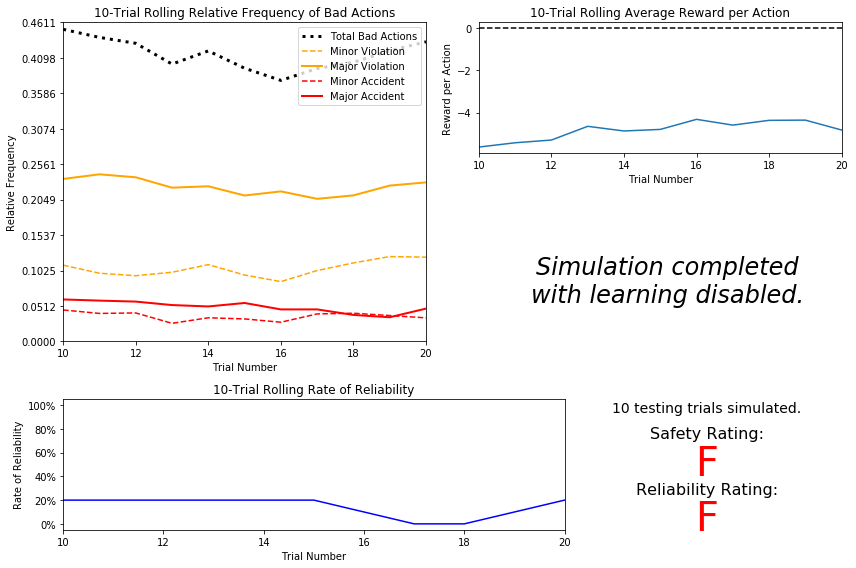

In [2]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliability make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:** The `'10-Trial Rolling Relative Frequency of Bad Actions'` graph indicates that the mean total bad actions frequency is around 40-42%. It also shows that roughly 10-11% of all actions led to an accident, so this means that about 25% of all bad actions resulted in an accident. The agent's rate of reliability stays at or below 20%. In this initial simulation, the agent takes no actions that algorithmically move the agent toward the destination. All actions are randomly chosen, so reaching a destination on time occurs purely by chance. As such, it makes sense that the rate of reliability is very low. The agent is mostly receiving negative rewards since the mean reward per action appears to be between -4.5 and -5. However, it's also probable that the agent occasionally receives positive rewards due to random chance; i.e., occasionally the random action will be `None` which will cause the *Smartcab* to idle at the intersection. If this happens to occur when the *Smartcab* is at a red light, then a positive reward likely is awarded. Hence, these observations seem to suggest that the agent is occasionally penalized heavily for choosing actions that would cause the *Smartcab* to get into an accident. These heavy penalties pull the mean reward per action lower. The graphs suggest that the results are not changing significantly as the number of trials increases. This makes perfect sense. We would not expect the agent's performance to systematically improve or degrade while its actions are chosen randomly. This *Smartcab* would be considered extremely **unreliable** and **unsafe**, since it gets an **F** rating in both of these metrics. Random action selection is not a good design.

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate? Please note that whatever features you eventually choose for your agent's state, must be argued for here. That is: your code in agent.py should reflect the features chosen in this answer.
*

NOTE: You are not allowed to engineer new features for the smartcab. 

**Answer:** The most relevant features for learning **safety** and **reliability** available to the agent are:
+ `"waypoint"`: next waypoint on a path toward the destination,
+ `"inputs['light']"`: color of the traffic light (i.e., `'red'` or `'green'`),
+ `"inputs['oncoming']"`: next waypoint for oncoming traffic,
+ `"inputs['left']"`: next waypoint for traffic to the left of the agent.

The agent's next waypoint is important in order for the agent to learn actions that take it toward the destination. Without this feature the agent might learn to always be safe, but it will not necessarily choose safe actions that take it toward the destination. In other words, the *Smartcab* will not be reliable. 

The color of the light at the agent's intersection is important in order for the agent to learn to avoid committing traffic violations. Traffic violations may lead to traffic accidents; that's why we have traffic rules. As such, traffic violations affect the safety rating of the agent, so the agent must learn this feature to ensure a good safety rating.

The intentions of oncoming traffic is important for the agent to learn actions that will avoid traffic accidents. For example, if the agent has a `'green'` light and its next waypoint is `'left'`, then the agent should learn to yield to oncoming traffic that might be either coming through the intersection or turning right into the same lane that the agent wants to enter. If the agent simply learned to take a left if the light was `'green'` and its next waypoint was `'left'`, then it might cause a major accident. That is very bad for safety. 

The intentions of the traffic that is approaching the intersection from the agent's left is important for the agent to learn actions that will *safely* improve the agent's reliability. If the agent is at an intersection with a `'green'` light, then the traffic from the left must have a `'red'` light, so there is no concern. However, if the agent is at an intersection with a `'red'` light and its next waypoint is `'right'`, then it would not be committing a traffic violation by turning as long as it could do so safely, i.e., as long as the traffic that is to the agent's left (if there is any) is not going straight through the intersection in the lane that the agent wants to turn into. If the agent wanted to be conservative in these situations, it could simply learn to always idle in this situation and wait for a `'green'` light, but such a policy would hurt the agent's reliability. If the laws allow for the turn to be made, and it's safe to do so, then the correct policy should be that the agent learns to *safely* improve its reliability in this situation.

There are two features that I did not choose for learning **safety** and **reliability**: 
+ `"inputs['right']"` (next waypoint for traffic to the right of the agent),
+ `"deadline"` (remaining number of steps for the agent to reach the destination). 

The reason that I am not choosing to use `"inputs['right']"` is that I think the information from that data would be redundant or unnecessary or both. If the agent is at an intersection with a `'green'` light, then the traffic to its right must have a `'red'` light. If the agent's next waypoint was either `'left'` or `'right'` then any traffic from the right would not have opportunity to interact with the agent. If the agent was going through the intersection, then it has right-of-way, so any traffic from the right would be required to yield and would be committing a traffic violation if it did not. On the other hand, if the agent is at an intersection with a `'red'` light, then the goal is that it learns not to turn left or go straight even if its next waypoint is in those one of those directions. That can be learned from the color of the traffic light input combined with the `'waypoint'` feature. It would be redundant to also know the intentions of the traffic coming from the right. At this same intersection, if it is the case that the agent's next waypoint is `'right'`, then it needs only to concern itself with the intentions of any traffic coming from its left, not its right.

The reason that I am not choosing `'deadline'` is that a construct such as time remaining until some arbitrary deadline is reached will not have any affect on the optimal policy. If the agent is in a certain situation (i.e., *state*), then it will not matter if there are three or twenty steps until the deadline is reached. At that moment, the optimal policy will be to choose a safe action that moves the agent in the direction of the destination. It cannot jump intersections if time is running low, and it should not linger unnecessarily if time is plentiful. The agent should always simply choose the action that is safe, legal, and moves it toward the destination, as long as moving is safe and legal. In other words, there is no utility in the *Smartcab* wandering around the city before moving toward the destination; it should try and get there as quickly and safely as possible from the beginning.

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the environment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:** Let $N_w$ be the number of possible values for `"waypoint"`, $N_t$ be the number of possible values for `"inputs['light']"`, $N_o$ be the number of possible values for `"inputs['oncoming']"`, $N_l$ be the number of possible values for `"inputs['left']"`, and $\mathcal{S}$ be the state space set. Given those values, the cardinality of $\mathcal{S}$ is given by $|\mathcal{S}|=N_w\cdot N_t\cdot N_o\cdot N_l.$ The possible values for the features `"inputs['oncoming']"` and `"inputs['left']"` are `'None'`, `'forward'`, `'left'`, and `'right'`, so $N_o=N_l=4$. The possible values for `"waypoint"` are `'forward'`, `'left'`, and `'right'`, so $N_w=3$. The possible values for `"inputs['light']"` are `'red'` and `'green'`, so $N_t=2$. Thus, the size of the state space is $|\mathcal{S}|=3\cdot2\cdot4\cdot4=96$. This is not an extremely large number of states, so I do believe the driving agent can learn a policy for each of these states within a reasonable number of training trials.

*Note*: Technically speaking, within the simulation, the function that returns a value to the feature `'waypoint'` can return the value `'None'`. However, the agent does not need to learn an action when this state variable has this specific value. When `'waypoint'` is `'None'`, it means the agent has reached the destination. As such, as soon as the agent performs the action that got it to this location, the simulation will check to see if it got there with time remaining. If so, that trial will be considered a success and stopped before the agent is requested to choose another action.

### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the iterative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.05). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

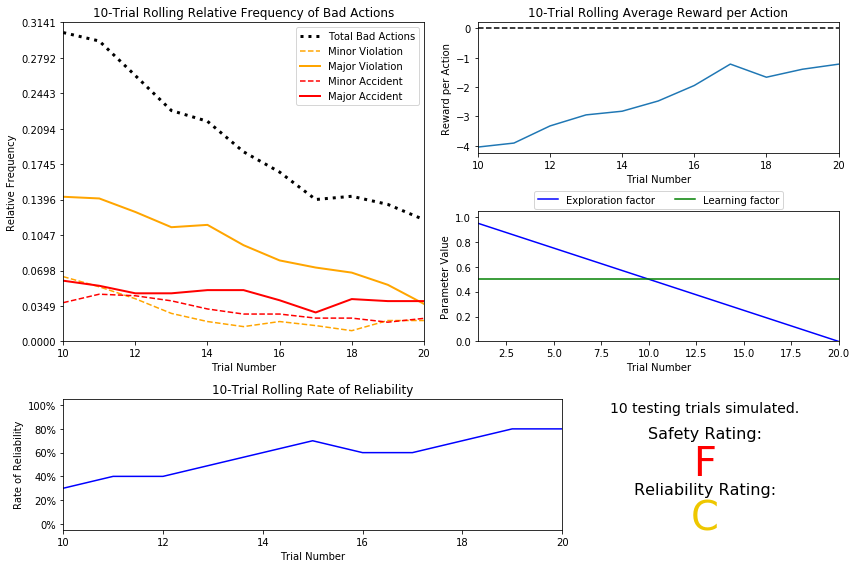

In [3]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:** As the number of training trials increases, the percentage of bad decisions made by the agent decreases from about 30% to approximately 13%. The proportion of those bad decisions that led to an accident does not show such a sharp decline; in fact, they do not change much at all as a percentage of all actions. The minor accidents decreased a little from about 3.5% to 3% of all decisions; whereas, major accidents decreased from about 6% to around 4.5% of all decisions. It appears that this initial Q-Learning simulation had the most affect on major violations, decreasing from about 14% to around 4%. The agent's rate of reliability appears to improve linearly as the number of training trials increases, from 30% to 80%; this is a much better performance than the basic driving agent's performance. We would certainly expect some improvement with regard to reliability, since we are now making use of Q-Learning and our state vector includes a directional component (`'waypoint'`). Hence, we should make the destination before the deadline more often than we did when our actions were random. We also notice that the agent's rewards per action are improving as the number of training trials increases; however, the values still remain negative. It appears that the `'10-Trial Rolling Average Reward per Action'` graph increases linearly from around -4 to about -1. Since we have already pointed out that the agent is still causing major accidents roughly 5% of the time and minor accidents around 3% of the time, it is clear that the agent is still being penalized heavily enough for these actions to prevent the average reward per action from becoming positive. We will need to improve the learner so that accident relative frequency approaches zero in order for the rewards per action to become positive. Despite the non-trivial improvements over the basic agent's performance, this agent still received an 'F' Safety Rating. This is not surprising. Given the grading system described above, we see that even a single major accident will result in an 'F' Safety Rating, and we have already established the major accident relative frequency of this agent. Since the Reliability Rating is proportion-based and the `'10-Trial Rolling Rate of Reliability'` increases as described above, we notice that this agent receives a 'C' Reliability Rating.

The only noticeable similarity between the basic agent and this default learning agent is that they both admit accidents at the relative frequency of around 5-10% resulting in 'F' Safety Ratings. This driving agent also required 20 training trials before entering '*Testing*'. This makes perfect sense. The default value of $\epsilon$ was 1.0, and it was decreased 0.05 (i.e., 1/20) per trial until the value was *less than* the default `'tolerance'` of 0.05, which will take 20 trials. The graph of $\epsilon$ as a function of 'trial number' is accurately represented in the graph above. It is of note to point out how and when the simulation modifies and uses $\epsilon$, though. The simulation updates $\epsilon$ when it resets the environment, which in-turn, resets all agents, and it does this even at the onset of the simulation. Hence, it actually calls the `'reset()'` function for the learning agent before any action decisions have been made or learning has been accomplished. So it decreases the value of $\epsilon$ from its default of 1.0 to 0.95 prior to using it for the first time. As such, the initial value of $\epsilon$ in the graph above is 0.95, not 1.0. This is a trivial aspect to correct, if it is desired that the learning algorithm must use a value of $\epsilon=1.0$ in the first trial.

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the implications it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

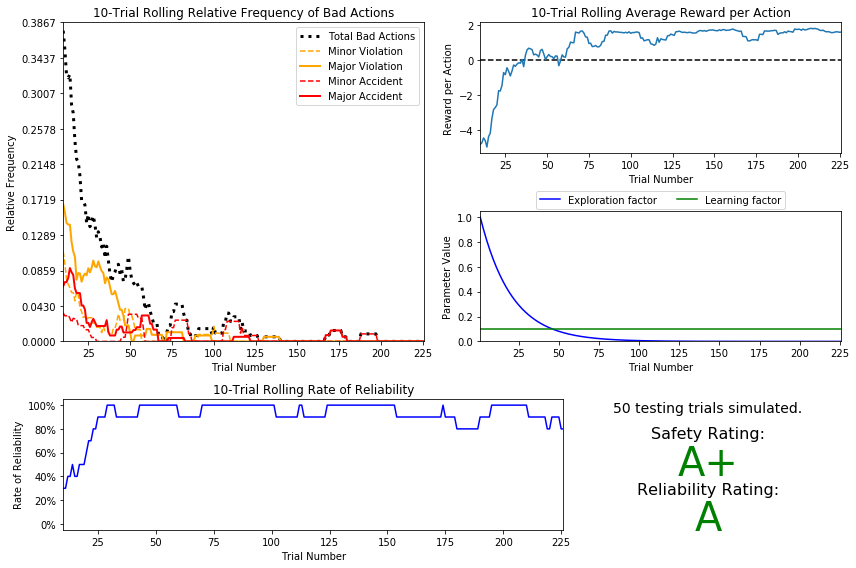

In [5]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:** First, allow me to give a detailed analysis of the visualization above, then I will address the additional questions regarding my parameter choices.

In this improved Q-Learning simulation, the percentage of bad decisions made by the agent decreases from about 38% to 0%. It actually bottoms out the first time after about 140 training trials, but then experiences two "bumps" in bad decisions before decreasing to zero for good after about 200 training trials. The rate of reliability increases very quickly to 80% after only about 25 training trials. It never dips below 80% again, even achieving 100% reliability for long stretches of trials throughout the simulation. Since this would be good enough for a 'B' *Reliability Rating*, we only continue for the remaining 200 training trials to improve the *Safety Rating* of the agent. We also notice that the agent's rewards per action eclipse the zero-boundary permanently after about 60 training trials; however, it does not stay consistently above one until after 125 training trials. Unlike before, this `'10-Trial Rolling Average Reward per Action'` graph doesn't increase linearly. It appears to behave somewhat logarithmically. It increases steeply when the reward per action value is negative (i.e., between 1 and 50 training trials), and then it begins increasing very slowly until it appears to almost level off. Of course, it could not continue this "logarithmic" behavior forever since there is most definitely an upper bound on positive rewards in the simulation. Given the improvements that I made to the Q-Learner, the new *Safety Rating* is 'A+', and the new *Reliability Rating* is 'A'.

If we let $\tau$ represent the trial number, then for $\tau = 1, 2, \ldots$, my decay function is given by $\epsilon(\tau) = 0.95^{(\tau-1)}$. I constructed it this way so that $\epsilon(1)=1$, and it doesn't decrease too quickly, which yielded the amount of training I was seeking given my chosen tolerance. My agent needed about 225 training trials before beginning testing. I realize that this is an order of magnitude above the base learning agent above, but the simulation does run quickly with the display turned off. The `Pygame` GUI is nice for visualization, but unnecessary for training the learner. I chose an $\epsilon$-tolerance of $10^{-5}$. Given my chosen $\epsilon$ decay function, I varied this tolerance between $10^{-2}$ and $10^{-6}$. I was moderately pleased with the learning agent with larger tolerance values than the final chosen one, but I was very pleased with the results using a tolerance of $10^{-5}$. I believe the run time of the simulation is reasonable. Even with 50 testing trials and this small tolerance, the entire simulation takes between 120 and 140 seconds to run, and I ran it many times. I don't believe that to be unreasonable given my safety and reliability performance goals. The reason I used 50 testing trials is due to the structure of the *Safety Rating*. Since it is absolute quantity (as opposed to proportion) based, I wanted to run many testing trials to make sure the agent always chooses an action that does not cause a traffic violation or accident. If I choose to use only 10 testing trials and a tolerance yielding about 150 training trials, then I could reduce the simulation run time to about 70-80 seconds, but the evaluation ratings would suffer. I chose a learning rate of $\alpha=0.1$ (which places a heavy dependence on existing Q-values when learning), because I found it to yield the best ratings for my chosen $\epsilon$ decay function. I tried values ranging from $\alpha=0.1$ to $\alpha=0.9$. I believe the results show that my agent did an excellent job of learning an appropriate policy, and I am very pleased with the safety and reliability ratings of the *Smartcab*. Due to the nature of the *Safety Rating* as described above, it is very easy to go from an 'A' to an 'F'. It only requires a single major accident; even a single minor accident will result in a 'D'. Thus, to get high ratings for safety, the agent's decision-making has to be extremely robust. I believe this forces us to require a large number of training trials.



### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8

1. Please summarize what the optimal policy is for the smartcab in the given environment. What would be the best set of instructions possible given what we know about the environment? 
   _You can explain with words or a table, but you should thoroughly discuss the optimal policy._

2. Next, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ 

3. Provide a few examples from your recorded Q-table which demonstrate that your smartcab learned the optimal policy. Explain why these entries demonstrate the optimal policy.

4. Try to find at least one entry where the smartcab did _not_ learn the optimal policy.  Discuss why your cab may have not learned the correct policy for the given state.

Be sure to document your `state` dictionary below, it should be easy for the reader to understand what each state represents.

**Answer:** *Note* - My `'state'` vector is a 4-tuple: (`waypoint`, `traffic light`, `oncoming traffic intent`, `left traffic intent`). Thus, an instance of my `'state'` vector like (`left`, `green`, `forward`, `left`) would indicate the following: 
+ the next waypoint of the agent is to the left; 
+ the agent is at a green light;
+ oncoming traffic intends to drive forward through the intersection;
+ traffic from the left intends to turn left.

##### Optimal Policy Discussion
To describe the optimal policy, we should first make note of several important aspects of the simulation environment and how it may differ from true traffic grids. These traffic lights are either `'red'` or `'green'`. There is no `'green arrow'` for left or right turns, and there is no `'yellow'` light. If the car wants to turn left, there is no optimal policy option of `'yield to oncoming, then turn left'`. In that situation the only option in the simulation enviornment is to `IDLE` at the intersection until the state is updated. So these situational possibilities are simplified, and there are 96 of them based on the `'state'` that I chose. First, preview the summary in the table below. Not only does it account for each of the 96 `'state'` combinations based on features I selected for the `state`, but it also accounts for all possibilities necessary to capture the optimal policy in this particular simulation environment. Below the table is a worded re-cap of the optimal policy. 

| Traffic Light  | Destination Direction  | Left-traffic Intent                   | Oncoming-traffic Intent                       | Optimal Policy  | Number of `'state'` Combinations |
|:---------------|:-----------------------|:--------------------------------------|:----------------------------------------------|----------------:|:--------------------------------:|
| `red`          | `left` or `forward`    | `None`, `forward`, `left`, or `right` | `None`, `forward`, `left`, or `right`     | `IDLE`          | 32                               |
| `red`          | `right`                | `forward`                             | `None`, `forward`, `left`, or `right`     | `IDLE`          | 4                                |
| `red`          | `right`                | `None`, `left`, or `right`            | `None`, `forward`, `left`, or `right`     | `TURN RIGHT`    | 12                               |
| `green`        | `right`                | `None`, `forward`, `left`, or `right` | `None`, `forward`, `left`, or `right`     | `TURN RIGHT`    | 16                               |
| `green`        | `forward`              | `None`, `forward`, `left`, or `right` | `None`, `forward`, `left`, or `right`     | `DRIVE FORWARD` | 16                               |
| `green`        | `left`                 | `None`, `forward`, `left`, or `right` | `None` or `left`                               | `TURN LEFT`     | 8                                |
| `green`        | `left`                 | `None`, `forward`, `left`, or `right` | `forward` or `right`                           | `IDLE`          | 8                                |

If a car arrives at an intersection with a `'red'` light, then it cannot `'TURN LEFT'` or `'DRIVE FORWARD'`. It does not matter what the oncoming traffic or traffic from the left is doing. The optimal policy is to `'IDLE'` at the intersection until the situation is different, if the car's intention is to perform either of those two actions. However, it is possible for the car to `'TURN RIGHT'` when it arrives at an intersection with a `'red'` light. If this is the case, then the only thing that matters is the intent of the traffic from the left. If that traffic intends to drive `'forward'` through the intersection, then the optimal policy for the car is to `'IDLE'` since the traffic from the left has right-of-way. If the intent of the traffic from the left is anything else, then the optimal policy is `'TURN RIGHT'`, since that traffic cannot interact with the car in question. Also, it does not matter what the intent of oncoming traffic is in either of these two situations, as that traffic also has a `'red'` light and cannot `'TURN LEFT'` into the lane of concern. 

If a car arrives at an intersection with a `'green'` light, then it is free to `'TURN RIGHT'` or `'DRIVE FORWARD'` if its destination is in either of those directions. In other words, the optimal policy would be to `'TURN RIGHT'` or `'DRIVE FORWARD'`, depending on the car's destination direction. It does not matter what the traffic from the left or oncoming traffic intends to do. Traffic from the left has a `'red'` light and must either `'IDLE'` or `'TURN RIGHT'`, neither of which affect the car in question. If the oncoming traffic intends to turn `'TURN LEFT'` and the car in question intends to `'TURN RIGHT'`, then it would be the oncoming traffic that must yield as the car in question has right-of-way. However, if it is the case that the car in question intends to `'TURN LEFT'` at this `'green'` light, then it must consider the intent of oncoming traffic. Oncoming traffic has right-of-way in this situation, so if oncoming traffic intends to `'DRIVE FORWARD'` through the intersection or `'TURN RIGHT'` into the lane of concern, then the optimal policy for the car in question is to `'IDLE'`. If the intent of oncoming traffic is `'None'` or `'TURN LEFT'`, then the optimal policy of the car in question is to `'TURN LEFT'` since it will not interact with any oncoming traffic. For both of these last two situations, it does not matter what the traffic to the left intends to do. Any such traffic would have a `'red'` light and could not `'TURN LEFT'` or `'DRIVE FORWARD'` legally. 

##### Investigation of `'sim_improved-learning.txt'`
My learning agent encountered all 96 possible states in the state space. It definitely did not learn the optimal policy in all 96 states. In fact, the optimal policy was learned only in 58 (60.4%) of the 96 possible states. This means that the learned policy in 38 states (39.6%) is not optimal. Of course, sub-optimal policies do not imply that the learning agent will make decisions that lead to a violation or accident. It is possible that the agent simply learns to avoid two actions that would lead to either a violation or accident. From the two remaining actions, one is optimal and the other simply takes the agent in a direction that is not the same as the next waypoint. This type of behavior might be fine for safety, but it can have negative implications for reliability. As evidenced by my simulation run above, the agent took no actions that led to a traffic violation or accident during the 50 testing trials. However, it is also the case that the driving agent did not reach the destination on-time for up to 5 of those testing trials.

##### Examples where the Agent Learned the Optimal Policy
1. For `'state = ('left', 'red', None, 'left')'` the Q-values are `'{None: 1.75, forward: -3.99, right: 0.04, left: -1.00}'`. In this situation the agent is at a `'red'` light, with a next waypoint of `'left'`, with an oncoming traffic intent of `'None'`, and a left traffic intent of `'left'`. As described above, the agent can never go `'left'` on a `'red'` light. The optimal policy is to `'IDLE'` at the intersection, which is exactly what it will choose to do using the Q-values mentioned above.

2. For `'state = ('right', 'green', None, 'right')'` the Q-values are `'{None: -0.56, forward: 0.01, right: 1.25, left: 0.12}'`. In this situation the agent is at a `'green'` light, with a next waypoint of `'right'`, with an oncoming traffic intent of `'None'`, and a left traffic intent of `'right'`. According to the description above, the agent may always `'TURN RIGHT'` on a `'green'` light regardless of what the oncoming or left traffic is doing. Hence, `'TURN RIGHT'` is the optimal policy, which will be chosen based on the Q-values mentioned above.

3. For `'state = ('forward', 'green', 'right', 'left')'` the Q-values are `'{None: 0.00, forward: 0.48, right: 0.00, left: -2.01}'`. In this situation the agent is at a `'green'` light, with a next waypoint of `'forward'`, with an oncoming traffic intent of `'right'`, and a left traffic intent of `'left'`. Based on the optimal policy description above, the agent may always `'DRIVE FORWARD'` on a `'green'` light regardless of what the oncoming or left traffic is doing. Hence, `'DRIVE FORWARD'` is the optimal policy, which is exactly what the agent will choose using the Q-values mentioned above.

##### Example where the Agent Did Not Learn the Optimal Policy
For `'state = ('left', 'red', 'left', 'left')'` the Q-values are `'{None: 0.00, forward: -1.04, right: 0.52, left: -1.08}'`. In this situation the agent is at a `'red'` light, with a next waypoint of `'left'`, with an oncoming traffic intent of `'left'`, and a left traffic intent of `'left'`. According to the optimal policy, the agent should choose to `'IDLE'` at the intersection. It definitely cannot `'DRIVE FORWARD'` or `'TURN LEFT'` without causing an accident. However, although it is not optimal with respect to steering the agent toward the desired location, turning right will not violate any traffic laws or cause any accidents. The oncoming traffic is stopped and cannot turn into the lane that the agent would use by turning right, and the traffic to the left is turning left, not going forward through the intersection. Hence, the agent will take a safe, but sub-optimal action in this state. The Q-value for the optimal policy is 0.00, so the agent likely did not learn the optimal policy due to lack of exploration. It seems likely that the agent didn't encounter this state enough times to ensure that it would explore the action `'None'` and find out what the reward for that action would be.

-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propagating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.